## Tracer transport comparison between runs 


In [1]:
#import gsw as sw # Gibbs seawater package
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
sns.set_context('notebook')
sns.set_style('white')

In [17]:
def plot_transports_CS(ax0,ax1,ax2,ax3,ax4,ax5, dfcan, dfdif, color, lab):
    
    axs = [ax0,ax1,ax2,ax3,ax4,ax5]
    for ax in axs:
        ax.axhline(0, color='gold')
    
    # Tracers
    vertical =  dfcan.Vert_adv_trans_sb # only advective parts, ignoring diffusve for now      
    ax0.plot(np.arange(1,19,1)/2.0,(vertical)/1E5,color=color, label=lab)
    ax1.plot(np.arange(1,19,1)/2.0,(dfcan.CS1_adv_trans+dfcan.CS2_adv_trans)/1E5,color=color, label=lab)
    ax2.plot(np.arange(1,19,1)/2.0,(dfcan.CS3_adv_trans )/1E5,color=color, label=lab)
    ax3.plot(np.arange(1,19,1)/2.0,(dfcan.CS4_adv_trans+dfcan.CS5_adv_trans)/1E5,color=color, label=lab)
    ax4.plot(np.arange(1,19,1)/2.0,(dfcan.CS6_adv_trans )/1E5,color=color, label=lab)

    total = ( (dfcan.CS1_adv_trans ) +
              (dfcan.CS2_adv_trans ) +
              (dfcan.CS3_adv_trans ) +
              (dfcan.CS4_adv_trans ) +
              (dfcan.CS5_adv_trans ) +
              (dfcan.CS6_adv_trans ) +
               vertical)

    ax5.plot(np.arange(1,19,1)/2.0,total/1E5,color=color, label=lab)

def plot_transports_Wat(ax0,ax1,ax2,ax3,ax4,ax5,dfcan2, color, lab):
    axs = [ax0,ax1,ax2,ax3,ax4,ax5]
    for ax in axs:
        ax.axhline(0, color='gold')
  
    # Water
    ax0.plot(np.arange(19)/2.0,(dfcan2.Vert_water_trans_sb)/1E4,color=color, label=lab)
    ax1.plot(np.arange(19)/2.0,(dfcan2.CS1_water_trans+dfcan2.CS2_water_trans)/1E4,color=color, label=lab)
    ax2.plot(np.arange(19)/2.0,(dfcan2.CS3_water_trans)/1E4,color=color, label=lab)
    ax3.plot(np.arange(19)/2.0,(dfcan2.CS4_water_trans+dfcan2.CS5_water_trans)/1E4,color=color, label=lab)
    ax4.plot(np.arange(19)/2.0,(dfcan2.CS6_water_trans)/1E4,color=color, label=lab)
 
    total2 = (dfcan2.CS1_water_trans +
              dfcan2.CS2_water_trans +
              dfcan2.CS3_water_trans +
              dfcan2.CS4_water_trans +
              dfcan2.CS5_water_trans +
              dfcan2.CS6_water_trans +
              dfcan2.Vert_water_trans_sb)

    ax5.plot(np.arange(19)/2.0,total2/1E4,color=color, label=lab)

def plot_transports_anom(ax0,ax1,ax2,ax3,ax4,ax5, dfcan, dfdif, dfcanNoC, dfdifNoC, color, lab):
    axs = [ax0,ax1,ax2,ax3,ax4,ax5]
    for ax in axs:
        ax.axhline(0, color='gold')
    
    # Tracers
    vertical =  dfcan.Vert_adv_trans_sb # only advective parts, ignoring diffusve for now   
    verticalNoC =  dfcanNoC.Vert_adv_trans_sb  
    
    ax0.plot(np.arange(1,19,1)/2.0,(vertical-verticalNoC)/1E5,color=color, label=lab)
    ax1.plot(np.arange(1,19,1)/2.0,(dfcan.CS1_adv_trans+dfcan.CS2_adv_trans-
                                    (dfcanNoC.CS1_adv_trans+dfcanNoC.CS2_adv_trans))/1E5,color=color, label=lab)
    ax2.plot(np.arange(1,19,1)/2.0,(dfcan.CS3_adv_trans-dfcanNoC.CS3_adv_trans)/1E5,color=color, label=lab)
    ax3.plot(np.arange(1,19,1)/2.0,(dfcan.CS4_adv_trans+dfcan.CS5_adv_trans-
                                    (dfcanNoC.CS4_adv_trans+dfcanNoC.CS5_adv_trans))/1E5,color=color, label=lab)
    ax4.plot(np.arange(1,19,1)/2.0,(dfcan.CS6_adv_trans-dfcanNoC.CS6_adv_trans)/1E5,color=color, label=lab)

    total = ((dfcan.CS1_adv_trans ) +
             (dfcan.CS2_adv_trans ) +
             (dfcan.CS3_adv_trans ) +
             (dfcan.CS4_adv_trans ) +
             (dfcan.CS5_adv_trans ) +
             (dfcan.CS6_adv_trans ) +
             vertical)
    totalNoC = ((dfcanNoC.CS1_adv_trans ) +
                (dfcanNoC.CS2_adv_trans ) +
                (dfcanNoC.CS3_adv_trans ) +
                (dfcanNoC.CS4_adv_trans ) +
                (dfcanNoC.CS5_adv_trans ) +
                (dfcanNoC.CS6_adv_trans ) +
                verticalNoC)

    ax5.plot(np.arange(1,19,1)/2.0,(total-totalNoC)/1E5,color=color, label=lab)

def plot_tr_net(ax0,ax1,ax2, dfcan, dfdif, dfcanNoC, dfdifNoC, color, lab):
    axs = [ax0,ax1,ax2]
    for ax in axs:
        ax.axhline(0, color='gold')
    
    canyon = tot_trans(dfcan, dfdif)
    no_canyon = tot_trans(dfcanNoC, dfdifNoC)
    
    ax0.plot(np.arange(1,19,1)/2.0,(canyon)/1E5,color=color, label=lab)
    ax1.plot(np.arange(1,19,1)/2.0,(no_canyon)/1E5,color=color, label=lab)
    ax2.plot(np.arange(1,19,1)/2.0,(canyon-no_canyon)/1E5,color=color, label=lab)
    
def tot_trans(dfcan, dfdif):
    vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)   
    total = ( (dfcan.CS1_adv_trans ) +
              (dfcan.CS2_adv_trans ) +
              (dfcan.CS3_adv_trans ) +
              (dfcan.CS4_adv_trans ) +
              (dfcan.CS5_adv_trans ) +
              (dfcan.CS6_adv_trans ) +
               vertical)
    return(total)

def plotCSPos(ax,CS1,CS2,CS3,CS4,CS5,CS6):
    ax.axvline(CS1,color='k',linestyle=':')
    ax.axvline(CS2,color='k',linestyle=':')
    ax.axvline(CS3,color='k',linestyle=':')
    ax.axvline(CS4,color='k',linestyle=':')
    ax.axvline(CS5,color='k',linestyle=':')
    ax.axvline(CS6,color='k',linestyle=':')
 

In [5]:
#Exp
Grid = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/gridGlob.nc' 
GridOut = Dataset(Grid)

GridNoC = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/gridGlob.nc' 
GridNoCOut = Dataset(GridNoC)

State = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/stateGlob.nc' 
StateNoC = '/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/stateGlob.nc' 

Canyon


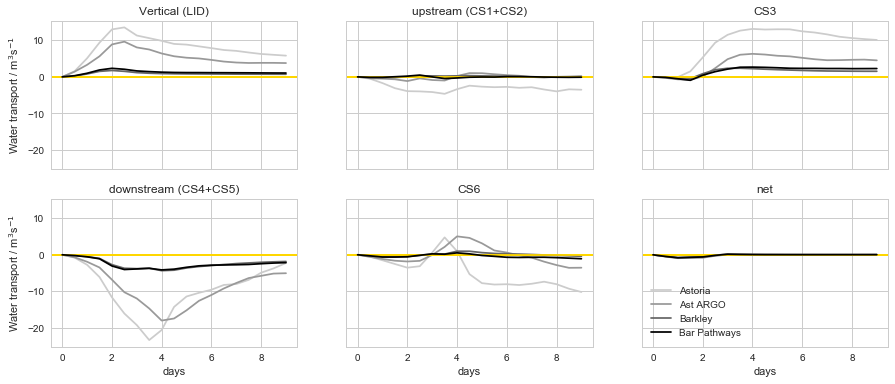

In [18]:
sns.set_style('whitegrid')

exps = ['UPW_10TR_BF2_AST/01_Ast03',
        'UPW_10TR_BF2_AST/03_Ast03_Argo',
        'UPW_10TR_BF4_BAR/01_Bar03',
        'UPW_10TR_BF4_BAR/03_Bar03_Path']

colors = ['0.8', '0.6', '0.4', 'k']
labels = ['Astoria','Ast ARGO', 'Barkley', 'Bar Pathways']

fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(15,6), sharey=True, sharex=True)

for exp, color, lab in zip(exps, colors, labels):
    # Water
    file2 = ('/data/kramosmu/results/TracerExperiments/%s/water_CS_transports.nc' %exp)
    dfcan2 = xr.open_dataset(file2)
  
    plot_transports_Wat(ax0,ax1,ax2,ax3,ax4,ax5, dfcan2, color, lab)
    
ax5.legend(loc=0)
axs = [ax0,ax1,ax2,ax3,ax4,ax5]
titles = ['Vertical (LID)','upstream (CS1+CS2)', 'CS3', 'downstream (CS4+CS5)', 'CS6', 'net']

for ax,title in zip(axs,titles):
    ax.set_title(title)
for ax in [ax3,ax4,ax5]:
    ax.set_xlabel('days')
   
ax0.set_ylabel('Water transport / m$^3$s$^{-1}$')
ax3.set_ylabel('Water transport / m$^3$s$^{-1}$')
print('Canyon')

no canyon


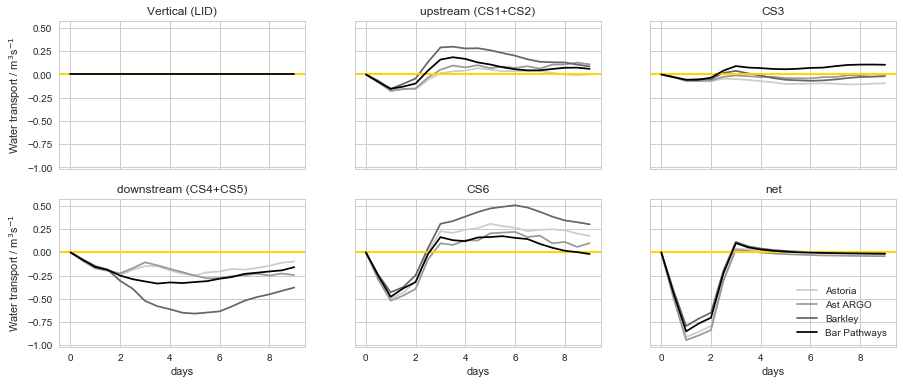

In [7]:
sns.set_style('whitegrid')

expsNoC = ['UPW_10TR_BF2_AST/02_Ast03_No_Cny',
           'UPW_10TR_BF2_AST/04_Ast03_No_Cny_Argo',
           'UPW_10TR_BF4_BAR/02_Bar03_No_Cny',
           'UPW_10TR_BF4_BAR/04_Bar03_No_Cny_Path']

colors = ['0.8', '0.6', '0.4', 'k']
labels = ['Astoria','Ast ARGO', 'Barkley', 'Bar Pathways']

fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(15,6), sharey=True, sharex=True)

for exp, color, lab in zip(expsNoC, colors, labels):
    # Water
    file2 = ('/data/kramosmu/results/TracerExperiments/%s/water_CS_transports.nc' %exp)
    dfcan2 = xr.open_dataset(file2)
  
    plot_transports_Wat(ax0,ax1,ax2,ax3,ax4,ax5, dfcan2, color, lab)
    
ax5.legend(loc=0)
axs = [ax0,ax1,ax2,ax3,ax4,ax5]
titles = ['Vertical (LID)','upstream (CS1+CS2)', 'CS3', 'downstream (CS4+CS5)', 'CS6', 'net']

for ax,title in zip(axs,titles):
    ax.set_title(title)
for ax in [ax3,ax4,ax5]:
    ax.set_xlabel('days')
   
ax0.set_ylabel('Water transport / m$^3$s$^{-1}$')
ax3.set_ylabel('Water transport / m$^3$s$^{-1}$')
print('no canyon')

Linear 01


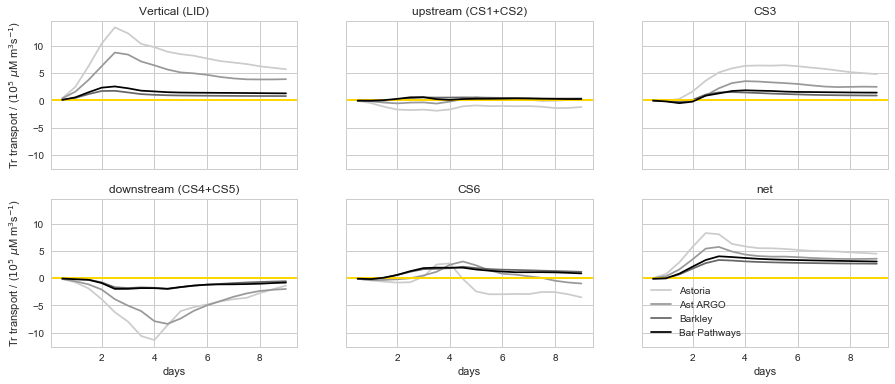

Salinty 02


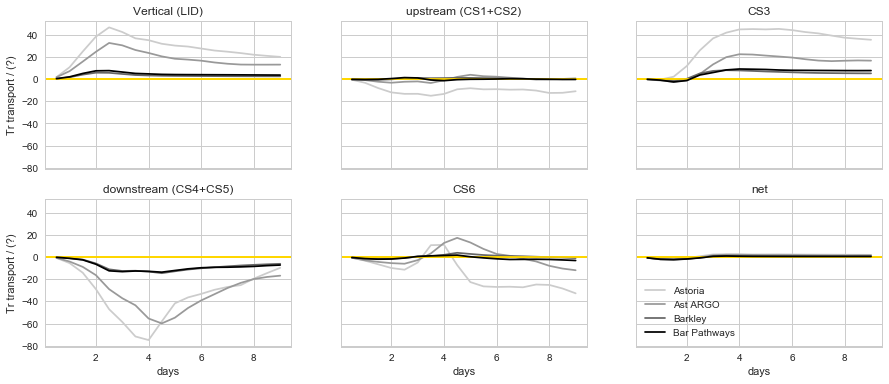

Oxygen 03


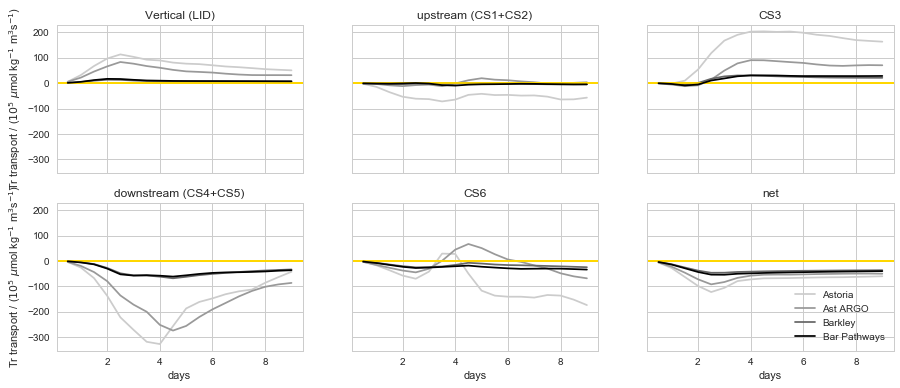

Nitrate 04


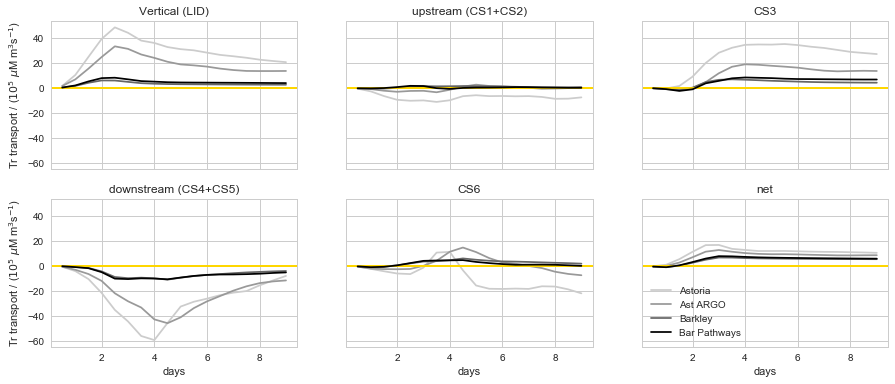

Silicate 05


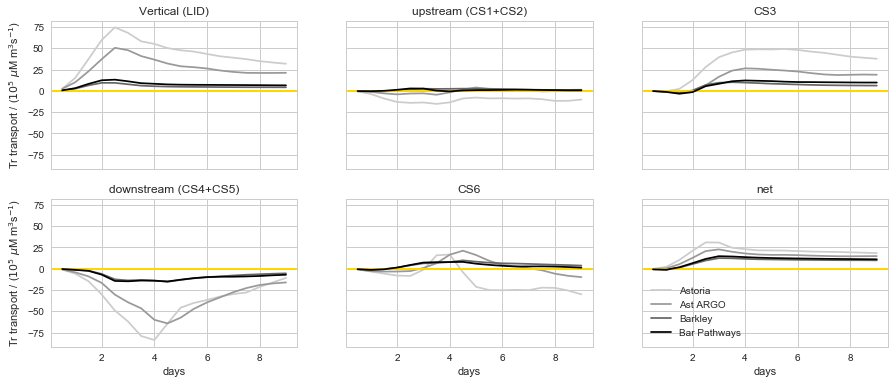

Phosphate 06


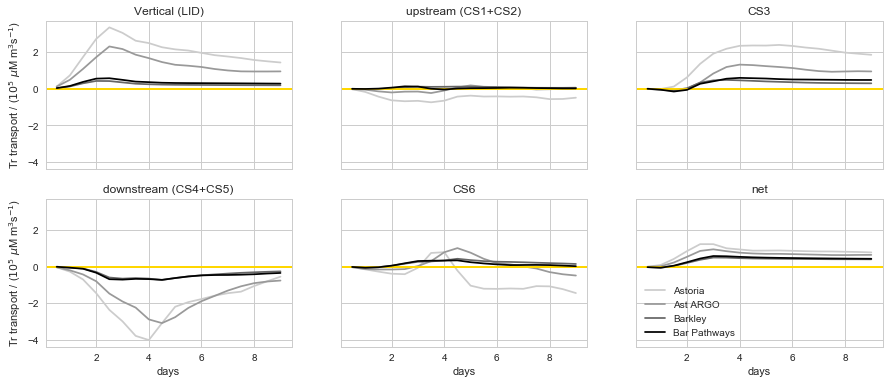

Nitrous Oxide 07


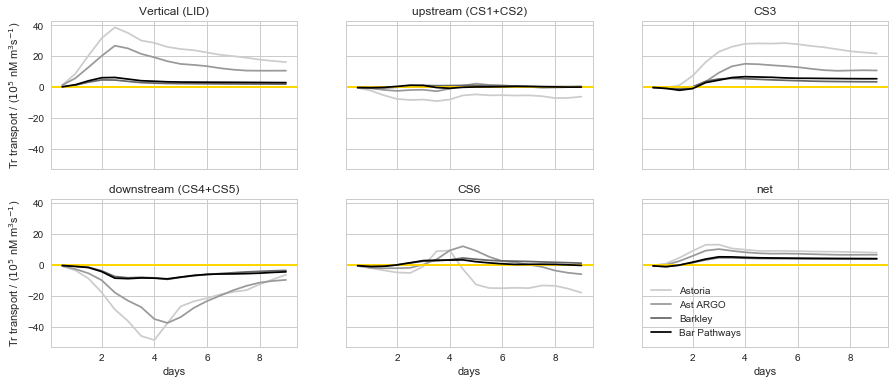

Methane 08


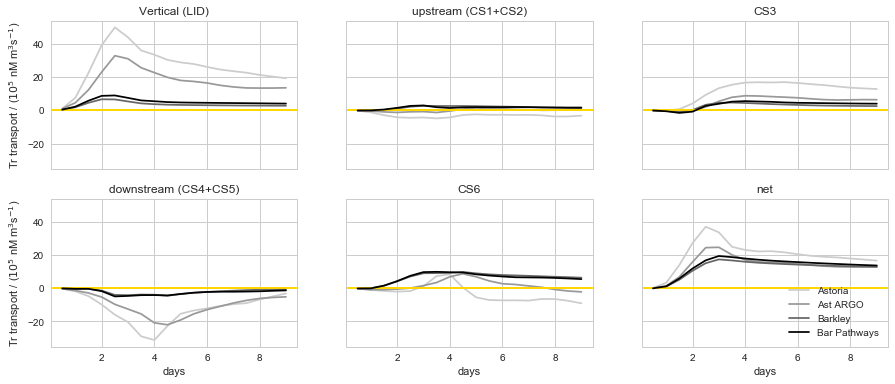

DIC 09


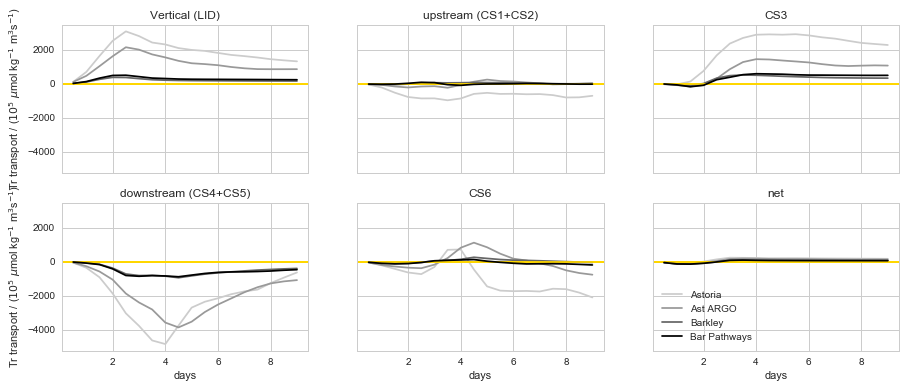

Alkalinty 10


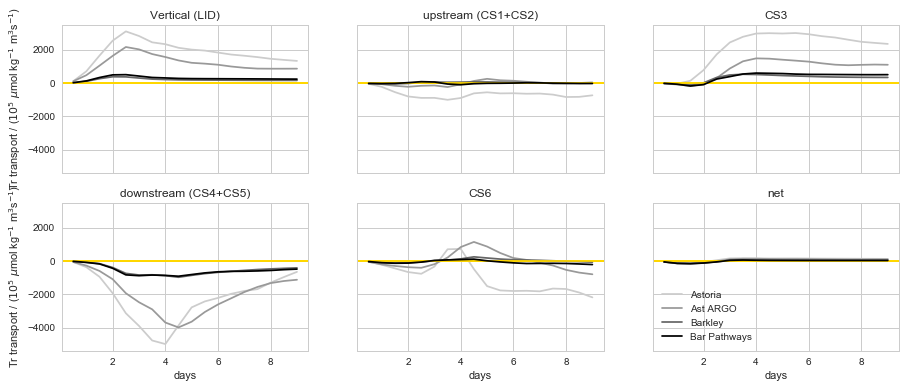

In [8]:
units = ['($10^5$ $\mu$M m$^3$s$^{-1}$)',
         '(?)',
         '($10^5$ $\mu$mol kg$^{-1}$ m$^3$s$^{-1}$)',
         '($10^5$ $\mu$M m$^3$s$^{-1}$)',
         '($10^5$ $\mu$M m$^3$s$^{-1}$)',
         '($10^5$ $\mu$M m$^3$s$^{-1}$)',
        '($10^5$ nM m$^3$s$^{-1}$)',
         '($10^5$ nM m$^3$s$^{-1}$)',
         '($10^5$ $\mu$mol kg$^{-1}$ m$^3$s$^{-1}$)',
         '($10^5$ $\mu$mol kg$^{-1}$ m$^3$s$^{-1}$)']
tracers = ['TR01', 'TR02','TR03','TR04','TR05','TR06','TR07','TR08','TR09', 'TR10']
tr_labels = ['Linear 01','Salinty 02','Oxygen 03','Nitrate 04','Silicate 05',
             'Phosphate 06','Nitrous Oxide 07','Methane 08','DIC 09', 'Alkalinty 10']

for tr, unit, tr_lab in zip(tracers, units, tr_labels):
    fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(15,6), sharey=True, sharex=True)
    print(tr_lab)
    for exp, color, lab in zip(exps, colors, labels):
        file = ('/data/kramosmu/results/TracerExperiments/%s/adv%s_CS_transports.nc' %(exp,tr))
        filedif = ('/data/kramosmu/results/TracerExperiments/%s/dif%s_CS_transports.nc' %(exp,tr))

        dfcan = xr.open_dataset(file)
        dfdif = xr.open_dataset(filedif)

        plot_transports_CS(ax0,ax1,ax2,ax3,ax4,ax5, dfcan, dfdif, color, lab)
   
    ax5.legend(loc=0)
    axs = [ax0,ax1,ax2,ax3,ax4,ax5]
    titles = ['Vertical (LID)','upstream (CS1+CS2)', 'CS3', 'downstream (CS4+CS5)', 'CS6', 'net']

    for ax,title in zip(axs,titles):
        ax.set_title(title)
    for ax in [ax3,ax4,ax5]:
        ax.set_xlabel('days')
   
    ax0.set_ylabel('Tr transport / %s' %unit)
    ax3.set_ylabel('Tr transport / %s' %unit)
    plt.show()


#### Tracer transport
  For all tracers:
   * Barkley and Barkley Pathways are very similar thourgh all sections compared to the variations between Astoria and Astoria ARGO
   * Largest onshore (largest offshore for $O_2$) net transports occur in Astoria run.

No canyon, Linear 01


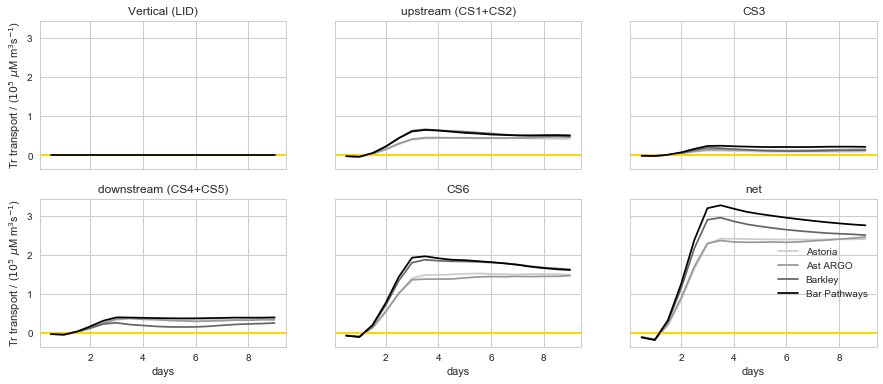

No canyon, Salinty 02


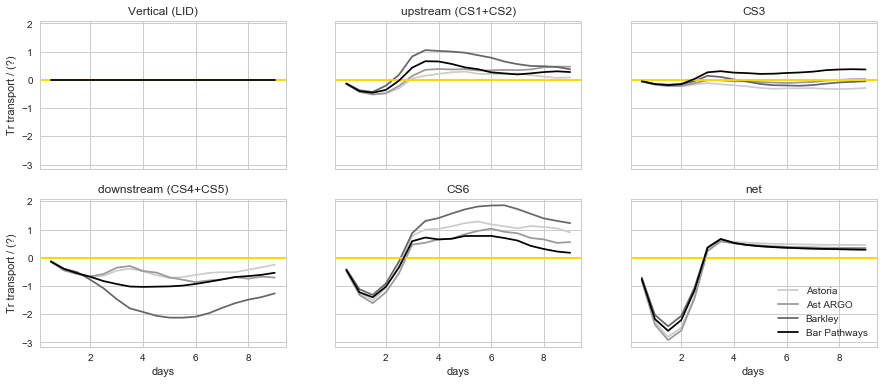

No canyon, Oxygen 03


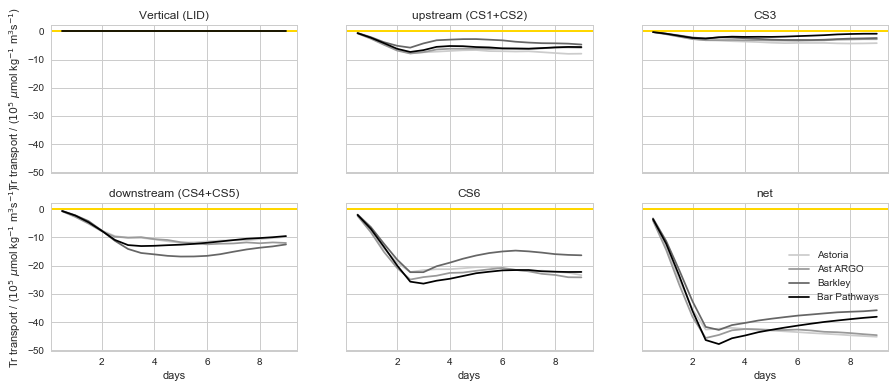

No canyon, Nitrate 04


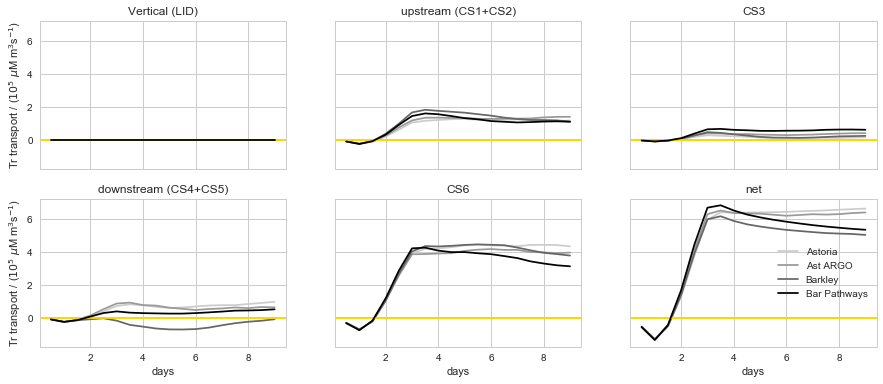

No canyon, Silicate 05


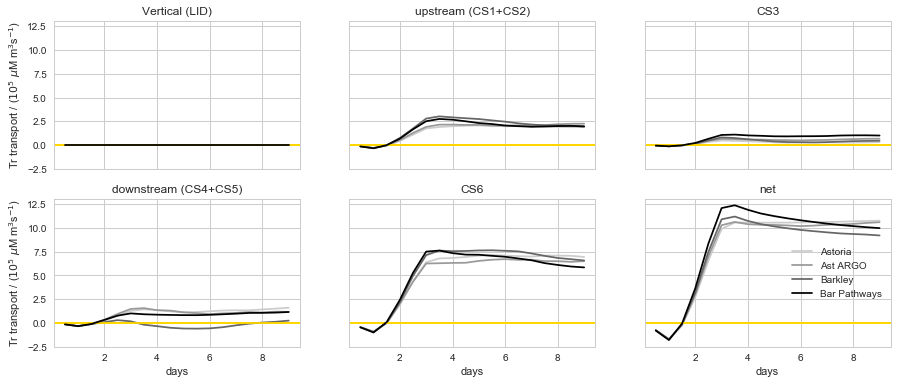

No canyon, Phosphate 06


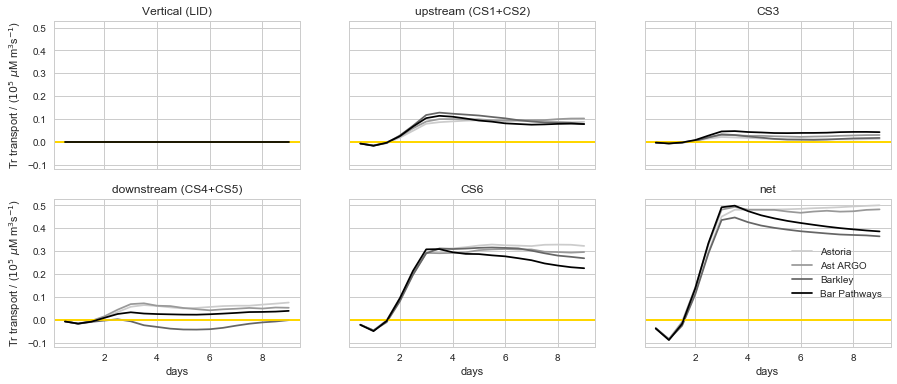

No canyon, Nitrous Oxide 07


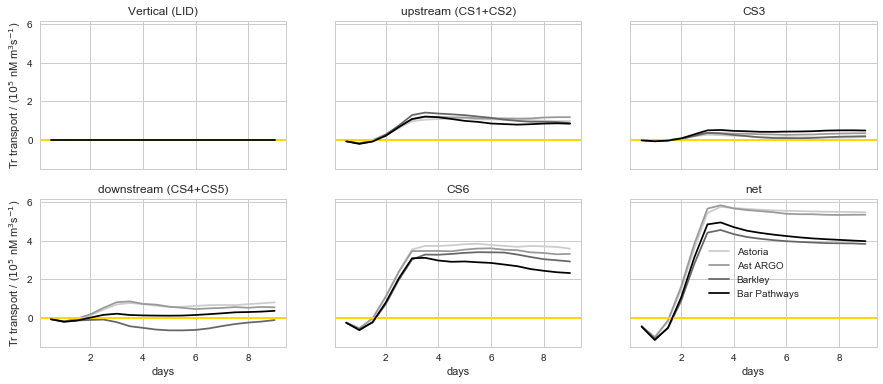

No canyon, Methane 08


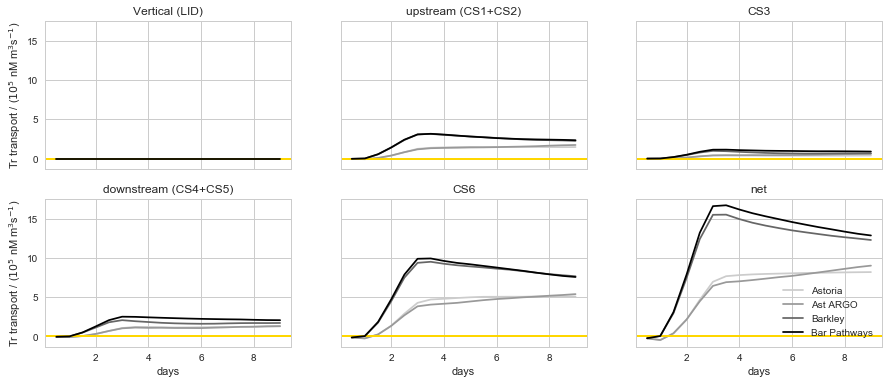

No canyon, DIC 09


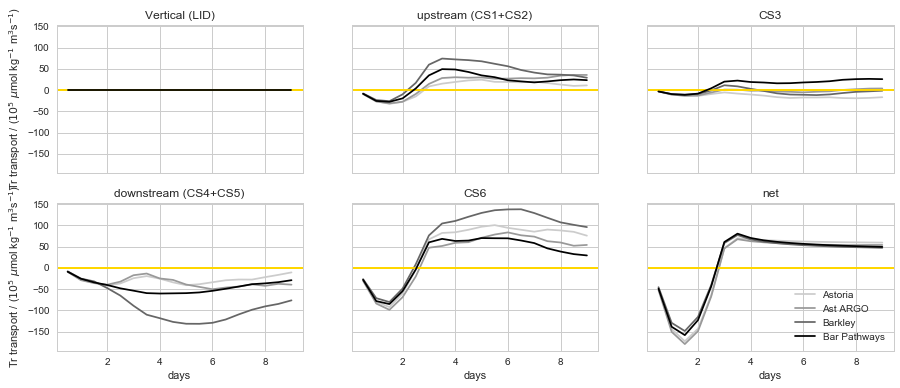

No canyon, Alkalinty 10


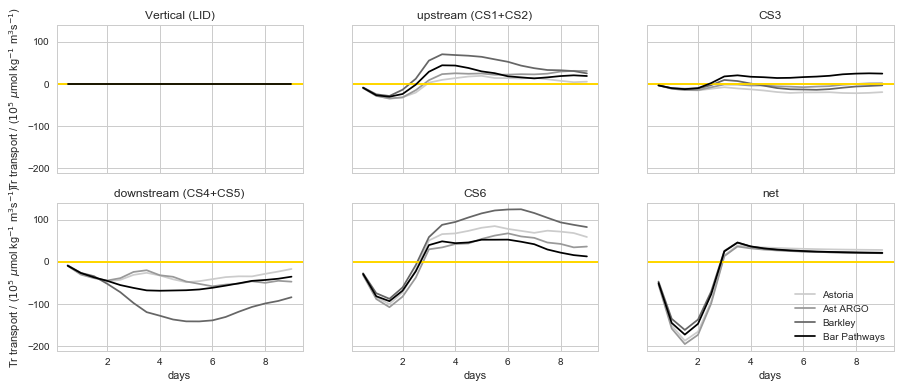

In [9]:
for tr, unit, tr_lab in zip(tracers, units, tr_labels):
    fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(15,6), sharey=True, sharex=True)
    print('No canyon, %s' %tr_lab)
    for exp, color, lab in zip(expsNoC, colors, labels):
        file = ('/data/kramosmu/results/TracerExperiments/%s/adv%s_CS_transports.nc' %(exp,tr))
        filedif = ('/data/kramosmu/results/TracerExperiments/%s/dif%s_CS_transports.nc' %(exp,tr))

        dfcan = xr.open_dataset(file)
        dfdif = xr.open_dataset(filedif)

        plot_transports_CS(ax0,ax1,ax2,ax3,ax4,ax5, dfcan, dfdif, color, lab)
   
    ax5.legend(loc=0)
    axs = [ax0,ax1,ax2,ax3,ax4,ax5]
    titles = ['Vertical (LID)','upstream (CS1+CS2)', 'CS3', 'downstream (CS4+CS5)', 'CS6', 'net']

    for ax,title in zip(axs,titles):
        ax.set_title(title)
    for ax in [ax3,ax4,ax5]:
        ax.set_xlabel('days')
   
    ax0.set_ylabel('Tr transport / %s' %unit)
    ax3.set_ylabel('Tr transport / %s' %unit)
    plt.show()


Anomaly, Linear 01


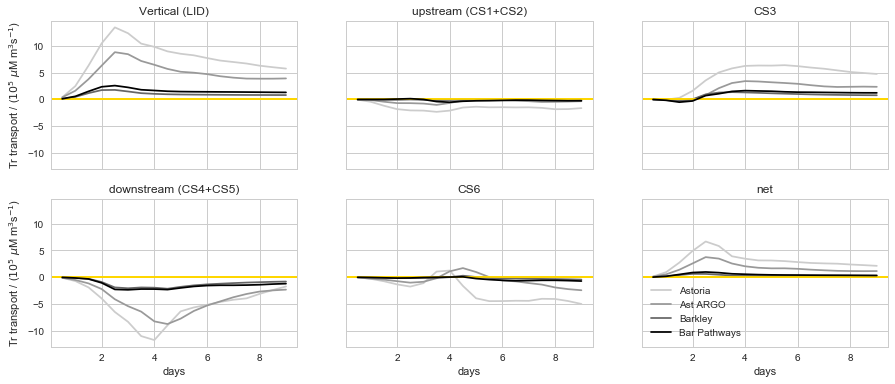

Anomaly, Salinty 02


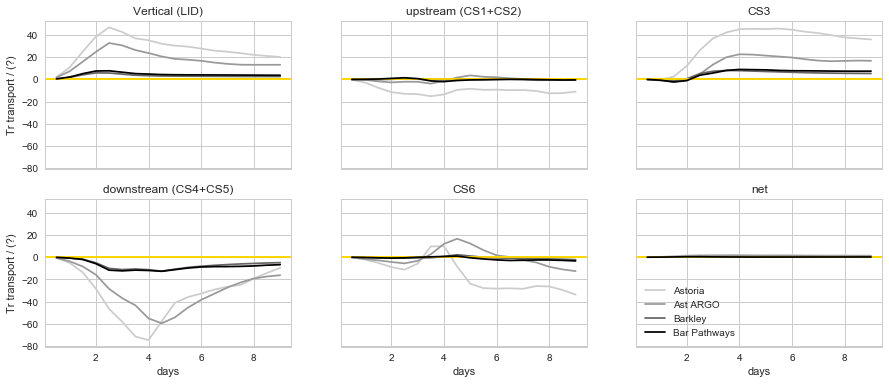

Anomaly, Oxygen 03


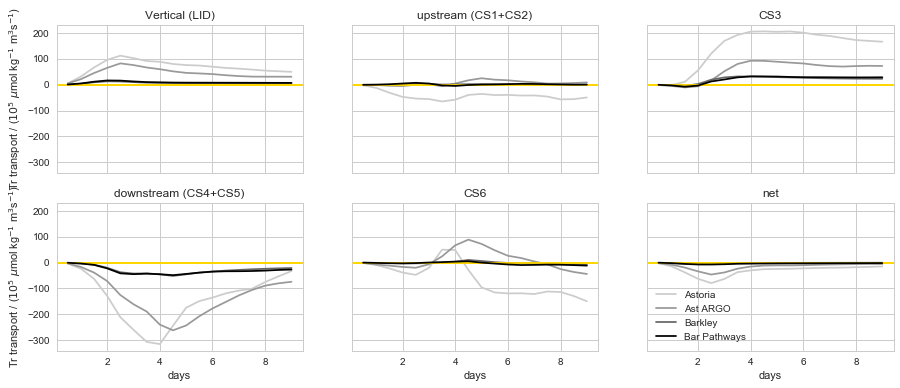

Anomaly, Nitrate 04


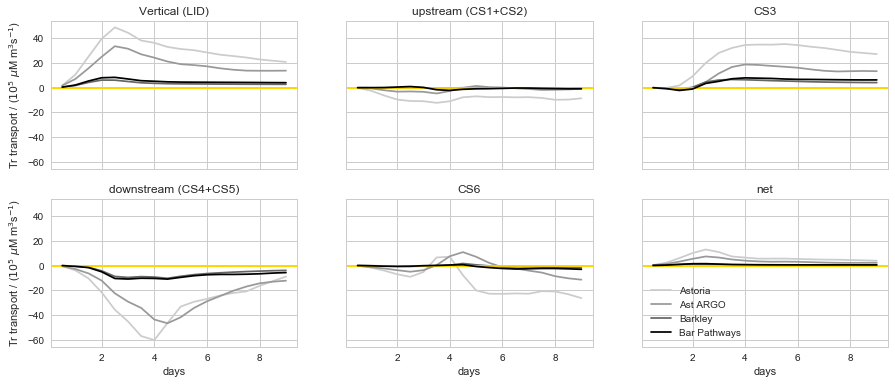

Anomaly, Silicate 05


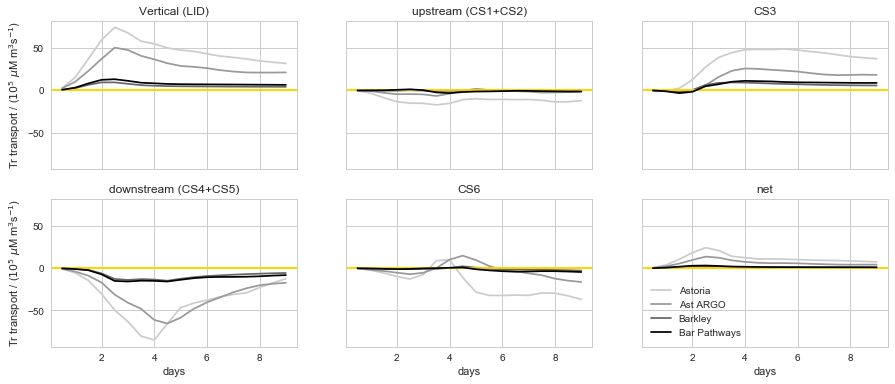

Anomaly, Phosphate 06


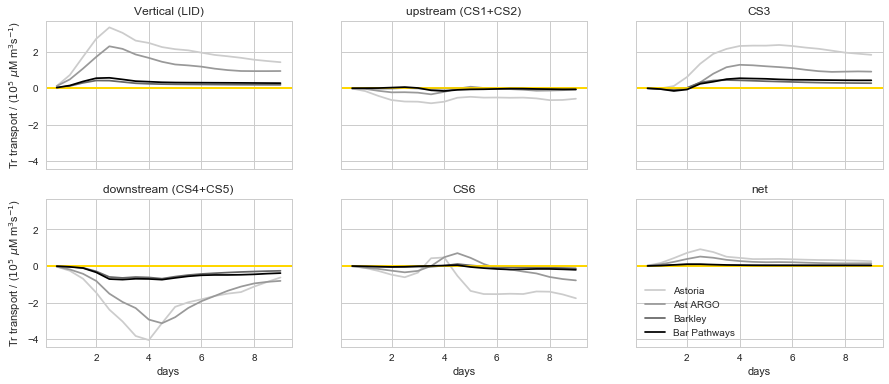

Anomaly, Nitrous Oxide 07


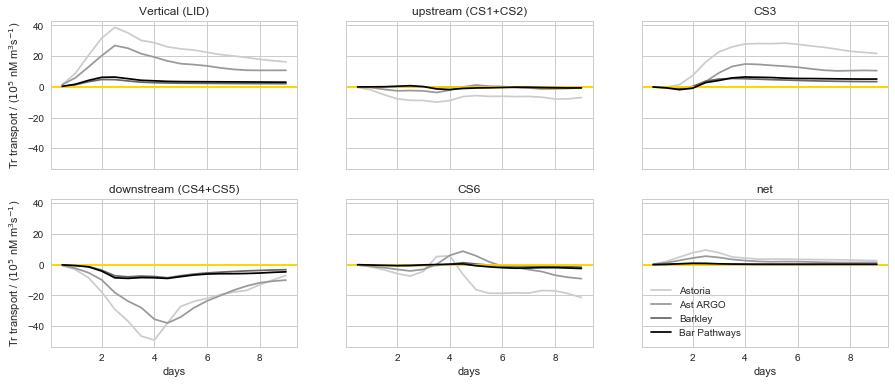

Anomaly, Methane 08


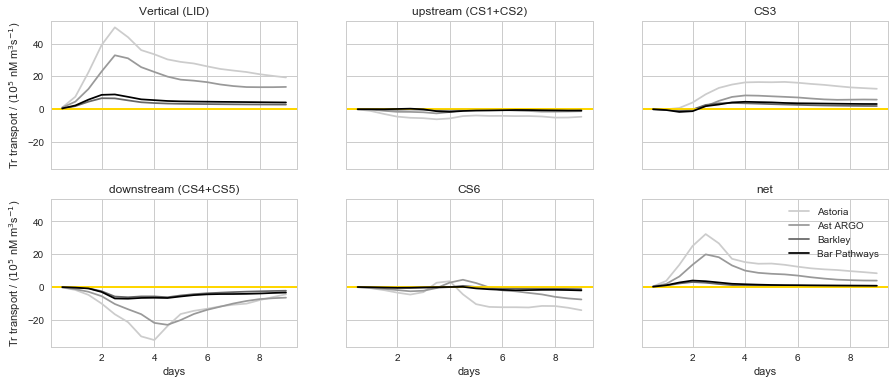

Anomaly, DIC 09


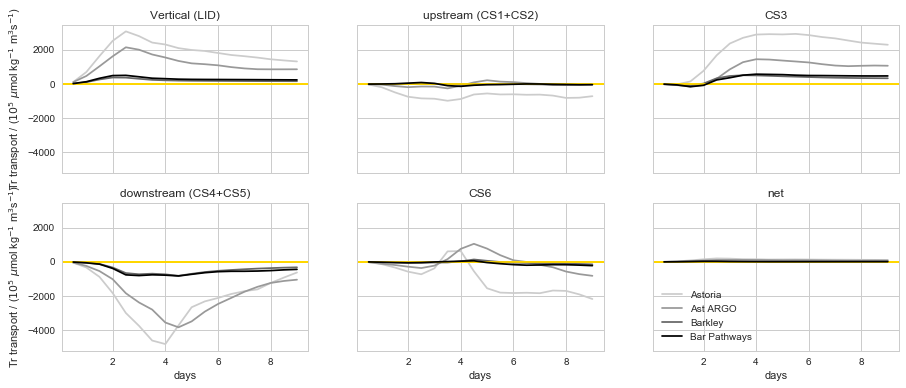

Anomaly, Alkalinty 10


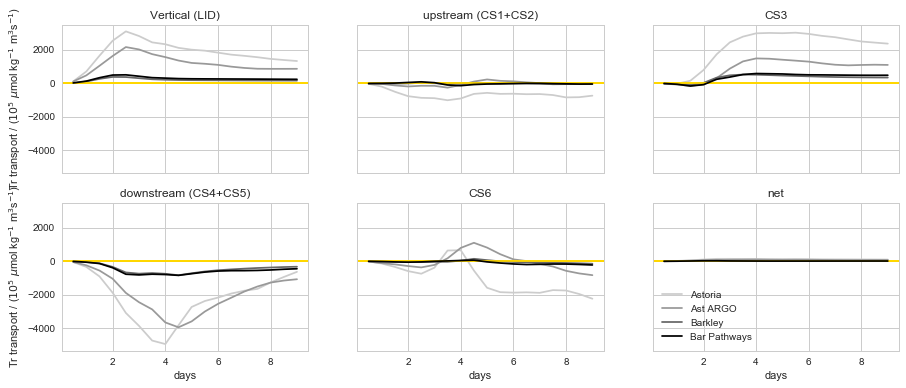

In [10]:
for tr, unit, tr_lab in zip(tracers, units, tr_labels):
    fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(15,6), sharey=True, sharex=True)
    print('Anomaly, %s' %tr_lab)
    for exp,expNoC, color, lab in zip(exps,expsNoC, colors, labels):
        file = ('/data/kramosmu/results/TracerExperiments/%s/adv%s_CS_transports.nc' %(exp,tr))
        filedif = ('/data/kramosmu/results/TracerExperiments/%s/dif%s_CS_transports.nc' %(exp,tr))
        fileNoC = ('/data/kramosmu/results/TracerExperiments/%s/adv%s_CS_transports.nc' %(expNoC,tr))
        filedifNoC = ('/data/kramosmu/results/TracerExperiments/%s/dif%s_CS_transports.nc' %(expNoC,tr))

        dfcan = xr.open_dataset(file)
        dfdif = xr.open_dataset(filedif)
        dfcanNoC = xr.open_dataset(fileNoC)
        dfdifNoC = xr.open_dataset(filedifNoC)

        plot_transports_anom(ax0,ax1,ax2,ax3,ax4,ax5, dfcan, dfdif, dfcanNoC, dfdifNoC, color, lab)
   
    ax5.legend(loc=0)
    axs = [ax0,ax1,ax2,ax3,ax4,ax5]
    titles = ['Vertical (LID)','upstream (CS1+CS2)', 'CS3', 'downstream (CS4+CS5)', 'CS6', 'net']

    for ax,title in zip(axs,titles):
        ax.set_title(title)
    for ax in [ax3,ax4,ax5]:
        ax.set_xlabel('days')
   
    ax0.set_ylabel('Tr transport / %s' %unit)
    ax3.set_ylabel('Tr transport / %s' %unit)
    plt.show()


Net transport, Linear 01


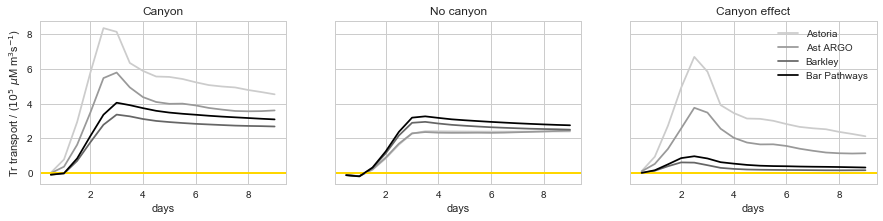

Net transport, Salinty 02


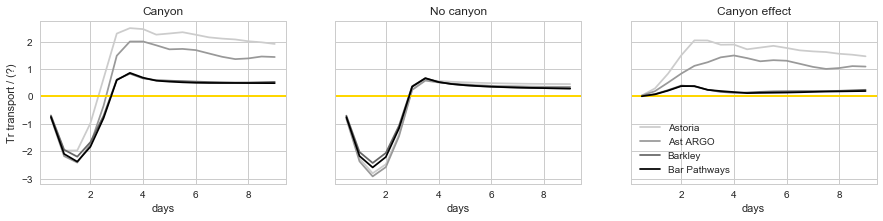

Net transport, Oxygen 03


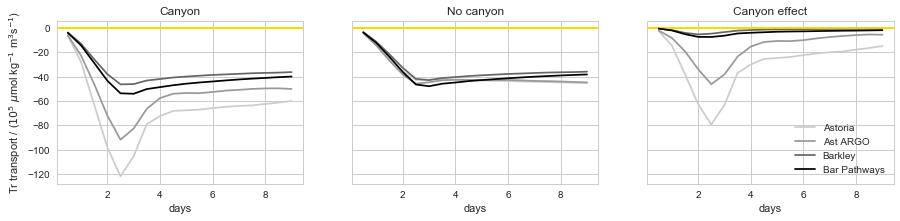

Net transport, Nitrate 04


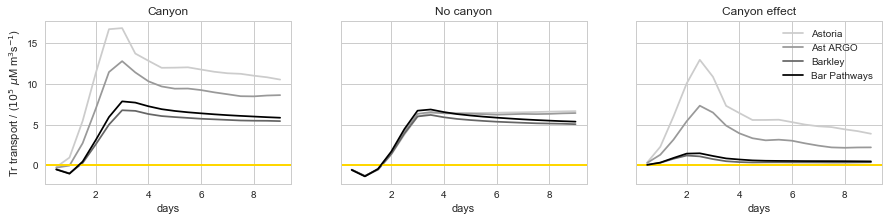

Net transport, Silicate 05


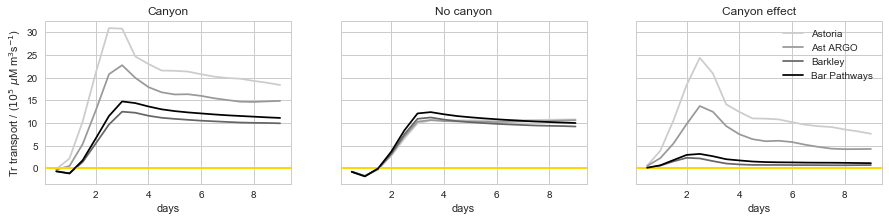

Net transport, Phosphate 06


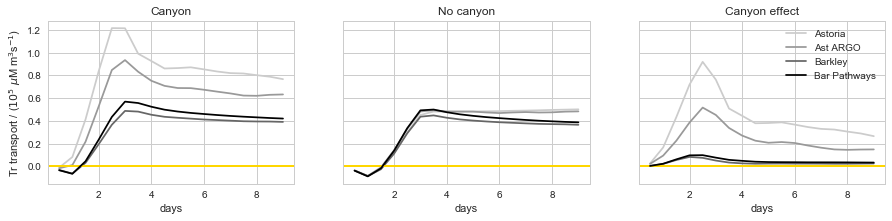

Net transport, Nitrous Oxide 07


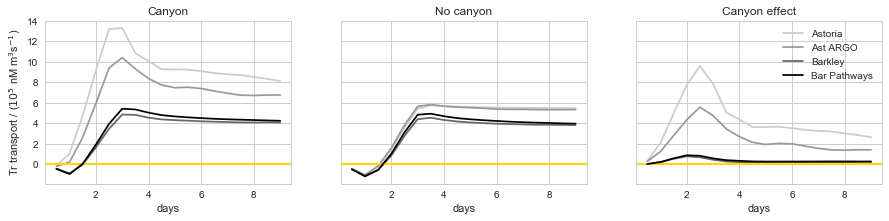

Net transport, Methane 08


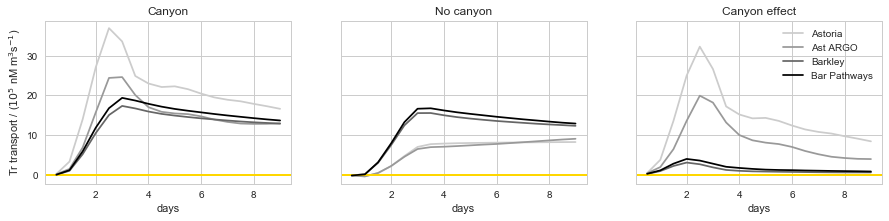

Net transport, DIC 09


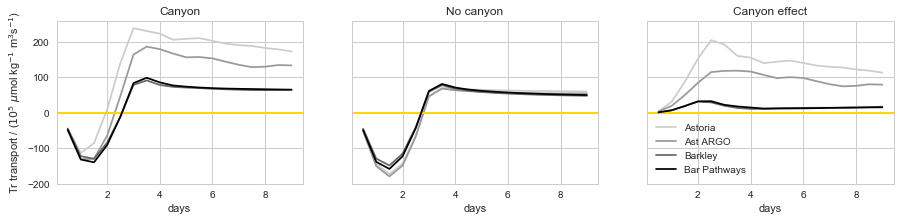

Net transport, Alkalinty 10


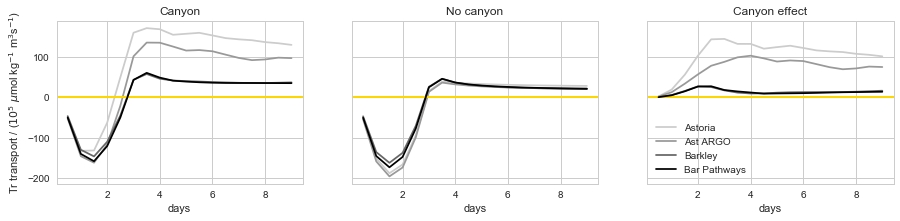

In [11]:
for tr, unit, tr_lab in zip(tracers, units, tr_labels):
    fig, ((ax0,ax1,ax2)) = plt.subplots(1,3,figsize=(15,3), sharey=True, sharex=True)
    print('Net transport, %s' %tr_lab)
    for exp,expNoC, color, lab in zip(exps,expsNoC, colors, labels):
        file = ('/data/kramosmu/results/TracerExperiments/%s/adv%s_CS_transports.nc' %(exp,tr))
        filedif = ('/data/kramosmu/results/TracerExperiments/%s/dif%s_CS_transports.nc' %(exp,tr))
        fileNoC = ('/data/kramosmu/results/TracerExperiments/%s/adv%s_CS_transports.nc' %(expNoC,tr))
        filedifNoC = ('/data/kramosmu/results/TracerExperiments/%s/dif%s_CS_transports.nc' %(expNoC,tr))

        dfcan = xr.open_dataset(file)
        dfdif = xr.open_dataset(filedif)
        dfcanNoC = xr.open_dataset(fileNoC)
        dfdifNoC = xr.open_dataset(filedifNoC)
        plot_tr_net(ax0,ax1,ax2, dfcan, dfdif, dfcanNoC, dfdifNoC, color, lab)
        
    ax2.legend(loc=0)
    axs = [ax0,ax1,ax2]
    titles = ['Canyon','No canyon', 'Canyon effect']

    for ax,title in zip(axs,titles):
        ax.set_title(title)
        ax.set_xlabel('days')
   
    ax0.set_ylabel('Tr transport / %s' %unit)
    plt.show()




### Tables 

In [12]:
labels_exp = ['Astoria', 'Ast. ARGO', 'Barkley', 'Bar. Path.']
labels_tra = ['Lin','Sal','Oxy','Nit','Sil','Pho','NiO','Met','DIC','Alk']

factors = [1,1,1,1,1,1,1E-3,1E-3,1,1]

print ("\t".join(['Run &', 
                  'Mean net adv phase ($10{^4}$ units) &',
                  'rel to Ast (%) &',
                  'Canyon contribution \% &',
                  'Max net td phase ($10{^4}$ units) &', 
                  'rel to Ast (%) &', 
                  'Canyon contribution \% &',
                 ]))

for tr, unit, tr_lab, factor in zip(tracers, units, labels_tra, factors):
    for exp,expNoC, lab_exp in zip(exps,expsNoC, labels_exp):
        file = ('/data/kramosmu/results/TracerExperiments/%s/adv%s_CS_transports.nc' %(exp,tr))
        filedif = ('/data/kramosmu/results/TracerExperiments/%s/dif%s_CS_transports.nc' %(exp,tr))
        fileNoC = ('/data/kramosmu/results/TracerExperiments/%s/adv%s_CS_transports.nc' %(expNoC,tr))
        filedifNoC = ('/data/kramosmu/results/TracerExperiments/%s/dif%s_CS_transports.nc' %(expNoC,tr))
        
        fileAst = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/adv%s_CS_transports.nc' %(tr))
        filedifAst = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/dif%s_CS_transports.nc' %(tr))
        fileNoCAst = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/adv%s_CS_transports.nc' %(tr))
        filedifNoCAst = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/02_Ast03_No_Cny/dif%s_CS_transports.nc' %(tr))

        dfcan = xr.open_dataset(file)
        dfdif = xr.open_dataset(filedif)
        dfcanNoC = xr.open_dataset(fileNoC)
        dfdifNoC = xr.open_dataset(filedifNoC)
        
        dfcanAst = xr.open_dataset(fileAst)
        dfdifAst = xr.open_dataset(filedifAst)
        dfcanNoCAst = xr.open_dataset(fileNoCAst)
        dfdifNoCAst = xr.open_dataset(filedifNoCAst)
        
        # Astoria 01 run
        canyonAst = tot_trans(dfcanAst, dfdifAst)*factor
        no_canyonAst = tot_trans(dfcanNoCAst, dfdifNoCAst)*factor
        mean_canyonAst = np.mean(canyonAst[8:])  # during advective phase
        max_canyonAst = np.max(canyonAst[:])
        
        # Run
        canyon = tot_trans(dfcan, dfdif)*factor
        no_canyon = tot_trans(dfcanNoC, dfdifNoC)*factor
        percent_can = 100*(canyon-no_canyon)/canyon
        
        mean_canyon = np.mean(canyon[8:])  # during advective phase
        std_canyon = np.std(canyon[8:])  # during advective phase
        mean_can_effect = np.mean(canyon[8:]-no_canyon[8:])
        pc_mean_can_eff = 100*(mean_can_effect)/mean_canyon
        pc_mean_rel_Ast = 100*(mean_canyon)/mean_canyonAst
       
        max_canyon = np.max(canyon) # Max occurs during td phase
        max_can_effect = np.max(canyon-no_canyon)
        pc_max_can_eff = 100*(max_can_effect)/max_canyon
        pc_max_rel_Ast = 100*(max_canyon)/max_canyonAst
       
        print ("\t".join(['%s %s &' %(lab_exp,tr_lab), 
                  '%1.2f $\pm$ %1.2f &' %(mean_canyon/1E4, std_canyon/1E4),
                  '%1.2f &' %(pc_mean_rel_Ast),
                  '%1.2f &' %pc_mean_can_eff,
                  '%1.2f &' %(max_canyon/1E4), 
                  '%1.2f &' %(pc_max_rel_Ast), 
                  '%1.2f skl' %pc_max_can_eff,
                 ]))

Run &	Mean net adv phase ($10{^4}$ units) &	rel to Ast (%) &	Canyon contribution \% &	Max net td phase ($10{^4}$ units) &	rel to Ast (%) &	Canyon contribution \% &
Astoria Lin &	50.60 $\pm$ 3.39 &	100.00 &	52.63 &	83.16 &	100.00 &	80.22 skl
Ast. ARGO Lin &	37.66 $\pm$ 1.95 &	74.42 &	37.21 &	57.74 &	69.43 &	65.04 skl
Barkley Lin &	28.08 $\pm$ 1.02 &	55.49 &	6.84 &	33.66 &	40.48 &	18.69 skl
Bar. Path. Lin &	32.99 $\pm$ 1.52 &	65.19 &	12.00 &	40.46 &	48.66 &	24.26 skl
Astoria Sal &	21.38 $\pm$ 1.38 &	100.00 &	77.60 &	24.90 &	100.00 &	82.06 skl
Ast. ARGO Sal &	15.65 $\pm$ 1.65 &	73.22 &	75.38 &	20.03 &	80.43 &	74.54 skl
Barkley Sal &	5.36 $\pm$ 0.28 &	25.05 &	35.87 &	8.31 &	33.37 &	47.43 skl
Bar. Path. Sal &	5.05 $\pm$ 0.28 &	23.63 &	31.50 &	8.59 &	34.49 &	43.87 skl
Astoria Oxy &	-644.88 $\pm$ 26.01 &	100.00 &	31.74 &	-60.75 &	100.00 &	36.40 skl
Ast. ARGO Oxy &	-515.14 $\pm$ 16.44 &	79.88 &	15.75 &	-59.71 &	98.29 &	32.58 skl
Barkley Oxy &	-380.74 $\pm$ 14.00 &	59.04 &	1.89 &	-35.42 &	58.31